In [3]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt



In [39]:
setting_dict = {
'setting1' : ['12348/session_1','12354/session_2','12355/session_2'],
'setting2' : ['12349/session_1','12348/session_2','12350/session_1'],
'setting3' : ['12345/session_1','12353/session_1','12354/session_2','12355/session_2'],
'setting4' : ['12346/session_1','12349/session_2','12352/session_1','12351/session_1'],
'setting5' : ['12345/session_2','12346/session_2','12350/session_2','12351/session_2','12352/session_2','12353/session_2'],
}

In [5]:
data_dir = Path.cwd()
data_dir = data_dir / 'User_data'

In [6]:
#a fnctio to find deviation from the mean
def find_deviation_from_mean(data):
    mean = np.mean(data)
    return data - mean


In [7]:
file = 'User_data/12345/session_1/12345_session_1_22-03-2023_21-53_pulse_data.txt'

def getPulseData(file):
    pulse_data= []
    with open(file, 'r') as f:
        for line in f:
            line = line.strip()
            line = line.split('||')[2]
            pulse = line.split(',')[0][1:]
            pulse = float(pulse)
            if(pulse>=100.0):
                continue
            if(pulse<=60.0):
                #append any random value between 60.0 too 80.0
                val = float(random.randint(60, 80))
                pulse_data.append(val)
            pulse_data.append(float(pulse))
    return pulse_data

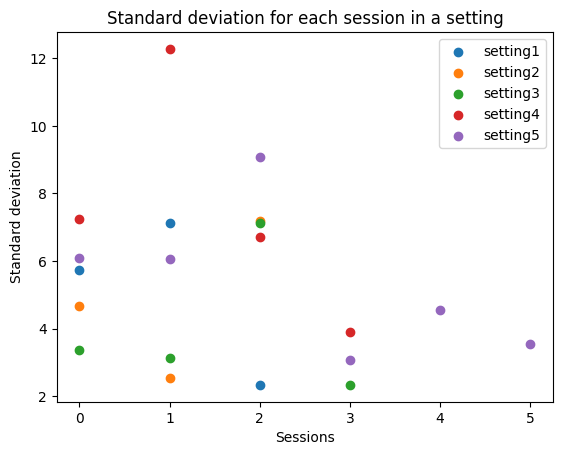

In [ ]:
avg_mean_deviation = []
for key,value in setting_dict.items():
    for sess in value:
        path = data_dir / sess
        for file in path.iterdir():
            if(str(file).endswith('pulse_data.txt')):
                pulse_data = getPulseData(file)
                #find standard deviation
                std = np.std(pulse_data)
                avg_mean_deviation.append(std)

    plt.scatter([x for x in range(len(avg_mean_deviation))],avg_mean_deviation,alpha=1)
    plt.legend(['setting1','setting2','setting3','setting4','setting5'])
    plt.xlabel('Sessions')
    plt.ylabel('Standard deviation')
    plt.title('Standard deviation for each session in a setting')
    avg_mean_deviation= []

In [ ]:
for i in range(1,6):
    curr_setting = 'setting'+str(i)
    avg_mean_deviation = []
    for sess in curr_setting:
        path = data_dir / sess
        print(path)
        #calculate the devition from the mean for each file 
        # and plot in one single plot with different colors
        for file in path.iterdir():
            if(str(file).endswith('pulse_data.txt')):
                pulse_data = getPulseData(file)
                pulse_data = find_deviation_from_mean(pulse_data)
                #find thre average deviation from the mean
                avg_deviation = np.mean(pulse_data)
                avg_mean_deviation.append(avg_deviation)
    
    plt.plot(avg_mean_deviation,len)

In [36]:
responses_file = 'RSME (Responses) - Form Responses 1.csv'

In [40]:
df = pd.read_csv(responses_file)
df.head()
temp_dict = setting_dict.copy()
for ind in df.index:
    sett = 'setting'+str((df['Setting'][ind]))
    temp_dict[sett].append(df['RSME'][ind])

In [41]:
print(temp_dict)

{'setting1': ['12348/session_1', '12354/session_2', '12355/session_2', 4, 5, 5], 'setting2': ['12349/session_1', '12348/session_2', '12350/session_1', 4, 6, 6], 'setting3': ['12345/session_1', '12353/session_1', '12354/session_2', '12355/session_2', 6, 6, 7, 7], 'setting4': ['12346/session_1', '12349/session_2', '12352/session_1', '12351/session_1', 7, 6, 7, 7], 'setting5': ['12345/session_2', '12346/session_2', '12350/session_2', '12351/session_2', '12352/session_2', '12353/session_2', 8, 8, 8, 7, 8, 9]}


In [49]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(x, rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, **kwargs)

In [79]:
RSME = []

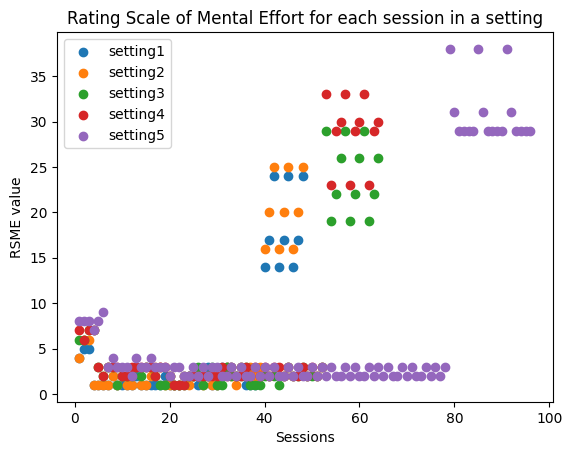

In [81]:
RMSE = []
for key,val in temp_dict.items():
    for va in val:
        if(type(va) != str):
            RSME.append(va)
    # jitter([x for x in range(len(RSME))],RSME)

    plt.scatter([x for x in range(1,len(RSME)+1)],RSME,alpha=1)
    plt.legend(['setting1','setting2','setting3','setting4','setting5'])
    plt.xlabel('Sessions')
    plt.ylabel('RSME value')
    plt.title('Rating Scale of Mental Effort for each session in a setting')
    RSME = []

In [75]:
responses_file = 'RSME (Responses) - Form Responses 1.csv'
df = pd.read_csv(responses_file)
#get header of dataframe
header = df.columns

anx_question = header[5:17]
# anx_dict = setting_dict.copy()
anx_dict = {
'setting1' : [],
'setting2' : [],
'setting3' : [],
'setting4' : [],
'setting5' : [],
}
opposite = [0,3,4,5,7,8,9,10,11]
#trverse through each row
for ind in df.index:
    sett = 'setting'+str((df['Setting'][ind]))
    sum = 0
    for i  in range(len(anx_question)):
        val = df[anx_question[i]][ind]
        val = val.split('-')[1]
        val = int(val)
        if(i in opposite):
            val = 5-val
        sum += val
    
    anx_dict[sett].append(sum)        


In [76]:
print(anx_dict)

{'setting1': [14, 17, 24], 'setting2': [16, 20, 25], 'setting3': [29, 19, 22, 26], 'setting4': [33, 23, 29, 30], 'setting5': [38, 31, 29, 29, 29, 29]}


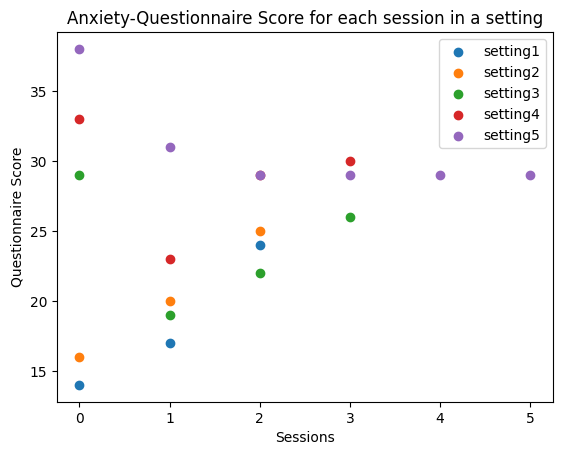

In [77]:
anx = []
for key,val in anx_dict.items():
    for va in val:
        if(type(va) != str):
            anx.append(va)
    # print(RSME)

    # jitter([x for x in range(len(RSME))],RSME)
    plt.scatter([x for x in range(len(anx))],anx,alpha=1)
    plt.legend(['setting1','setting2','setting3','setting4','setting5'])
    plt.xlabel('Sessions')
    plt.ylabel('Questionnaire Score')
    plt.title('Anxiety-Questionnaire Score for each session in a setting')
    anx = []

In [84]:
source_file = 'User_data/12345/session_2/12345_session_2_22-03-2023_21-59_HEP.csv'
df = pd.read_csv(source_file)
MW_source  = df['MW'].values

In [85]:
dest_file = 'User_data/12350/session_2/12350_session_2_01-04-2023_15-57_HEP.csv'
df = pd.read_csv(dest_file)
df['MW'] = MW_source
df.to_csv(dest_file,index=False)


In [95]:
def create_matrix(df):
    mw = df["MW"].values
    print(len(mw))
    result = [[0,0,0],[0,0,0],[0,0,0]]
    prev = None
    for i in mw:
        if prev == None:
            prev = i
        else:
            result[int(prev-1)][int(i-1)] +=1
            prev = i
    return result

In [100]:
def create_error_trans(df):
    result = [[0,0,0,0,0,0],[0,0,0,0,0,0]]
    mw = df["MW"].values
    state = df["State"].values
    prev_state = None
    prev_level = None
    for i in range(len(mw)):
        if prev_state == None:
            prev_state= state[i]
            prev_level = mw[i]
        else:
            curr_level = mw[i]
            curr_state = state[i]
            if(curr_level==1):
                result[prev_state][curr_state]+=1
            elif(curr_level==2):
                result[prev_state][curr_state+2]+=1
            elif(curr_level==3):
                result[prev_state][curr_state+4]+=1
            prev_state = curr_state
            prev_level = curr_level
    
    return result



In [184]:
def create_prob_tran_matrix(matrix,flag):
    if(flag==3):
        result = [[0,0,0],[0,0,0],[0,0,0]]
    else:
        result = [[0,0],[0,0]]
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            sum = np.sum(matrix[i])
            if(sum==0):
                sum =1
            result[i][j] = matrix[i][j]/sum
    return result

In [185]:
def param_state_prob(matrix):
    # calculate the eigenvalues and eigenvectors
    matrix = np.array(matrix)
    eigenvalues, eigenvectors = np.linalg.eig(matrix.T)

    # find the index of the eigenvalue closest to 1
    index = np.argmin(np.abs(eigenvalues - 1))

    # get the eigenvector corresponding to the eigenvalue 1
    eigenvector = eigenvectors[:, index]
    eigenvector = eigenvector / np.sum(eigenvector)

    # print("Eigenvalue: ", eigenvalues[index])
    # print("Eigenvector: ", eigenvector)

    return eigenvector
    

In [186]:
def get_error_state_prob_mat(matrix):
    mat_l = [[matrix[0][0],matrix[0][1]],[matrix[1][0],matrix[1][1]]]
    mat_2 = [[matrix[0][2],matrix[0][3]],[matrix[1][2],matrix[1][3]]]
    mat_3 = [[matrix[0][4],matrix[0][5]],[matrix[1][4],matrix[1][5]]]
    prob_mat1 = create_prob_tran_matrix(mat_l,2)
    prob_mat2 = create_prob_tran_matrix(mat_2,2)
    prob_mat3 = create_prob_tran_matrix(mat_3,2)
    return prob_mat1,prob_mat2,prob_mat3

In [190]:
def geteigen_MW(file):
    print(file)
    df = pd.read_csv(file)
    trans_mat = create_matrix(df)
    error_trans_mat = create_error_trans(df)
    prob_trans_mat = create_prob_tran_matrix(trans_mat,3)
    param_state_prob_mat= param_state_prob(prob_trans_mat)
    mat1,mat2,mat3 = get_error_state_prob_mat(error_trans_mat)
    param_state_prob_mat1= param_state_prob(mat1)
    param_state_prob_mat2= param_state_prob(mat2)
    param_state_prob_mat3= param_state_prob(mat3)
    final_mat = [param_state_prob_mat1,param_state_prob_mat2,param_state_prob_mat3]
    final_mat = np.array(final_mat)
    final_mat = final_mat.T

    #get the index of the max value in the array
    index_param = np.argmax(param_state_prob_mat)
    error_max =max(final_mat[index_param][0],final_mat[index_param][1])
    return param_state_prob_mat[index_param]*error_max
# param_state_prob_mat= param_state_prob(mat)

In [191]:
file = 'User_data/12352/session_1/12352_session_1_02-04-2023_21-51_HEP.csv'
geteigen(file)

User_data/12352/session_1/12352_session_1_02-04-2023_21-51_HEP.csv
185


0.06901634950415436

In [ ]:
data_dir = Path.cwd()
data_dir = data_dir / 'User_data'

for user in data_dir.iterdir():
    for session in user.iterdir():
        for file in session.iterdir():
            if(file.name.endswith('_HEP.csv')):
                val = geteigen(file)